In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import numpy as np
#used for numerical analysis
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers # a layer consists of a tensor-in tensor-out computation function
#Dense layer is the regular deeply connected neural network layer
from tensorflow.keras.layers import Dense, Flatten 
#Flatten-used fot flattering the input or change the dimension
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout #convolutional layer
#MaxPooling2D-for downsampling the image
from keras.preprocessing.image import ImageDataGenerator

Image Data Augmentation 

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
x_train=train_datagen.flow_from_directory(r'/content/drive/MyDrive/IBM/Dataset/TRAIN_SET',target_size=(64,64),batch_size=5,color_mode='rgb',class_mode='sparse')

x_test=test_datagen.flow_from_directory(r'/content/drive/MyDrive/IBM/Dataset/TRAIN_SET',target_size=(64,64),batch_size=5,color_mode='rgb',class_mode='sparse')

Found 4128 images belonging to 5 classes.
Found 4128 images belonging to 5 classes.


In [10]:
print(x_train.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [11]:
model = Sequential()

###Creating the model

In [12]:
#Initializing the CNN
classifier = Sequential()

In [13]:
#First convolution layer and pooling
classifier.add(Conv2D(32, (3, 3), input_shape=(64,64,3),activation='relu'))

In [14]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [16]:
#Second convolution Layer and pooling  
classifier.add(Conv2D(32, (3,3),activation='relu'))

In [17]:
#input_shape is going to be the pooled feature maps from the previous convolition layer
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [18]:
#Flattening the layers
classifier.add(Flatten())

In [19]:
#Adding a fully connected layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=5,activation='softmax'))

In [20]:
classifier.summary()#summary of our model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 27, 27, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 5408)             

In [21]:
#Compiling the CNN
#categorical_crossentropy for more than 2
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

##Fitting the model

In [38]:
model.fit_generator(generator=x_train,
                         steps_per_epoch = len(x_train),
                         epochs=20,
                         validation_data=x_test,
                         validation_steps = len(x_test))#no.of images in test set

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/20
826/826 [==============================] - 1063s 1s/step - loss: 0.6306 - accuracy: 0.2536 - val_loss: 0.5216 - val_accuracy: 0.1761
Epoch 2/20
826/826 [==============================] - 67s 81ms/step - loss: 0.4367 - accuracy: 0.2386 - val_loss: 0.3931 - val_accuracy: 0.1911
Epoch 3/20
826/826 [==============================] - 70s 85ms/step - loss: 0.3902 - accuracy: 0.2328 - val_loss: 0.3320 - val_accuracy: 0.2868
Epoch 4/20
826/826 [==============================] - 65s 79ms/step - loss: 0.3804 - accuracy: 0.2343 - val_loss: 0.2869 - val_accuracy: 0.2393
Epoch 5/20
826/826 [==============================] - 66s 80ms/step - loss: 0.3530 - accuracy: 0.2418 - val_loss: 0.2985 - val_accuracy: 0.2597
Epoch 6/20
826/826 [==============================] - 67s 81ms/step - loss: 0.3254 - accuracy: 0.2403 - val_loss: 0.2515 - val_accuracy: 0.2355
Epoch 7/20
826/826 [==============================] - 66s 80ms/step - loss: 0.3149 - accuracy: 0.2347 - val_loss: 0.2366 - val_accuracy:

###Saving the model

In [29]:
 #Saving the model
classifier.save('nutrition.h5')

###Predicting our resuts

In [33]:
from tensorflow.keras.models import load_model

In [34]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image 
model = load_model("nutrition.h5")

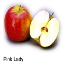

In [35]:
img = image.load_img(r'/content/drive/MyDrive/IBM/Dataset/TEST_SET/APPLES/n07740461_10011.jpg',grayscale=False,target_size= (64,64))#Loading the image
img

In [36]:
x = image.img_to_array(img)#image to array
x = np.expand_dims(x,axis = 0)#changing the shape
pred = np.argmax(model.predict(x)) #predicting the classes
pred

1/1 [==============================] - 0s 419ms/step


1

In [37]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = np.argmax(model.predict(x)) 
pred

1/1 [==============================] - 0s 20ms/step


1